In [1]:
import importlib
import compare_visualizer
import numpy as np

# NPZComparer

In [18]:
# make fake reference data
fn2 = np.arange(1*12*5*2*3*3).reshape((1, 12*5*2, 1, 3, 3)).astype(float)
fn1 = fn2 + np.random.random((1, 12*5*2, 1, 3, 3)) * 0.005 - 0.0025
fn1[0][0][0] = np.nan

tdb_fn = "tdb_err.npz"
np.savez(tdb_fn, darray_actual=fn1, darray_desired=fn2)
tpu_fn = "darray_tpu_out.npz"
model_fn = "darray_model_out.npz"
np.savez(model_fn, darray=fn1)
np.savez(tpu_fn, darray=fn2)

In [19]:
a = compare_visualizer.NPZComparer(fn1, fn2) #npz file name, npz file, dict-like object or np.darray are OK
# a = compare_visualizer.tdb_err_comparer(tdb_fn) # if you use bmodel_checker.py, specify the output filename. Large files may be slow.
# a = compare_visualizer.model_tpu_comparer(tpu_fn) # or
# a = compare_visualizer.model_tpu_comparer(model_fn) # if you use tpu-mlir and want to compare model and tpu output npzs. Specify either of them.

a.info() # prints the tensor names and shape of common data
# a.ref.info() # prints the tensor names and shape of reference data
# a.target.info() # prints the tensor names and shape of target data

Target tensors: 1, Ref tensors: 1, Common tensors: 1, Unmatched tensors:0
tensor='darray', #shape (1, 120, 1, 3, 3)


In [20]:
a.compare() # do compare like npz_tool

Target tensors: 1, Ref tensors: 1, Common tensors: 1, Unmatched tensors:0
tensor='darray', #(1, 120, 1, 3, 3) similarity: (1.000000, 0.999303, 57.141697)
min_similarity: (0.9999997615814209, 0.9993025000654325, 57.14169704516593)


In [21]:
a.compare(tolerance=(0.999, 0.999)) # set tolerance to see whether all tensors have passed

Target tensors: 1, Ref tensors: 1, Common tensors: 1, Unmatched tensors:0
tensor='darray', #(1, 120, 1, 3, 3) similarity: (1.000000, 0.999303, 57.141697) √
min_similarity: (0.9999997615814209, 0.9993025000654325, 57.14169704516593) √


In [22]:
a.compare(tolerance=(0.999, 0.9999), tensor='darray') # compare specific tensor(s)
# a.compare(tolerance=(0.999, 0.999), tensor=['darray'])

tensor='darray', #(1, 120, 1, 3, 3) similarity: (1.000000, 0.999303, 57.141697) ×
min_similarity: (0.9999997615814209, 0.9993025000654325, 57.14169704516593) ×


tensor='darray',
shape (1, 120, 1, 3, 3), reshaped to (1, 120, 3, 3), shown in (1, 120, 3, 3)
data distribution: mean 544.0000471844547, min 9.000267768652577, max 1078.9994385740335
vmin 0.0 zero point 541.7500235922273 vmax 1083.5000471844546 


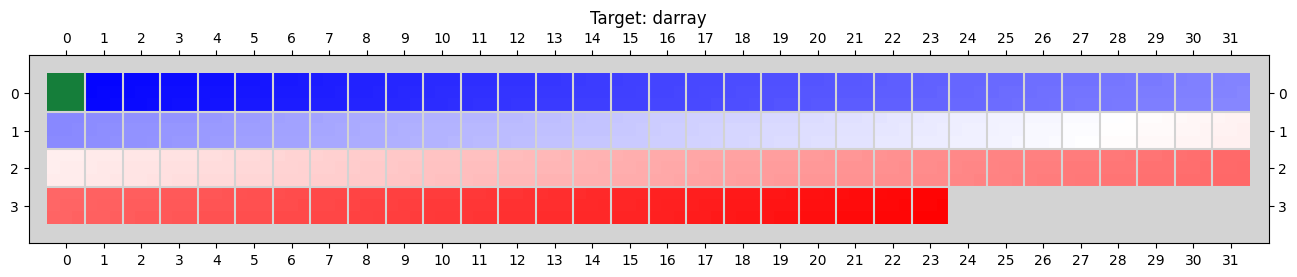

tensor='darray',
shape (1, 120, 1, 3, 3), reshaped to (1, 120, 3, 3), shown in (1, 120, 3, 3)
data distribution: mean 539.5, min 0.0, max 1079.0
vmin 0.0 zero point 541.7500235922273 vmax 1083.5000471844546 


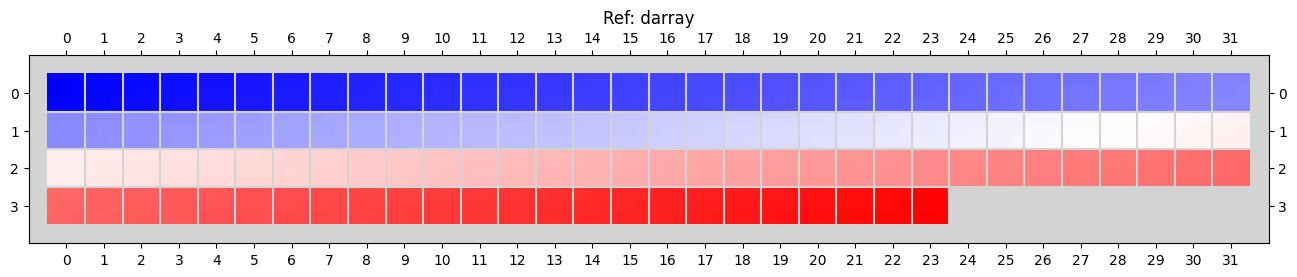

abs tol 0.001, rel tol 0
tensor='darray',
max diff neg -0.002495487584951661, pos 0.0024949488907282102, mean 1.2598149803161043e-05
abs diff min 0.0, max 0.002495487584951661, mean 0.001032445381000359
similarity: (0.9999997615814209, 0.9993025000654325, 57.14169704516593)
vmin -0.01 vmax 0.01


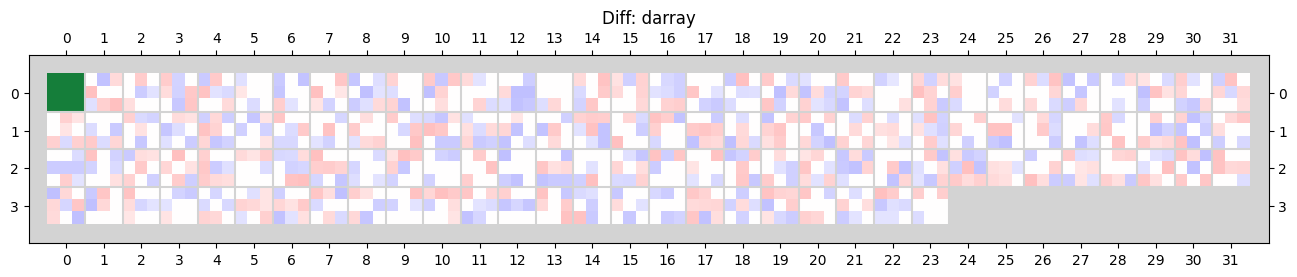

In [23]:
# a.plot_target( # plot the data distribution of target data
# a.plot_ref( # plot the data distribution of reference data
# a.plot_diff( # plot the difference of target and reference
a.plot_vs( # plot the previous three things
    abs_tol=0.001, # diff within tol will be treated as no difference.
    # rel_tol=1e-5, # if assgined rel_tol, values are rescaled, not original value.
    vmin=-0.01, vmax=0.01, # min max value of diff plot color map
    figsize=16, # the vertical size of generated figure, change it to make the figure clear. Horizontal size will be calculated automatically.
    c_columns=32, # channels on every row

#     tensor=None, # default; plot ALL the tensors. May cause OOM for large files, use with care
    tensor='darray', # tensor name, will be printed out before the figure. if np.darray, name is "darray". You can triple click the line printed out by .compare() or .info(), copy it and paste here for convinience.
#     tensor=['darray'], # plot a list of tensors

#     slices=(slice(0, 1), slice(2, 8)), # slice the ORIGINAL darray, passing slice object
#     slices=((0, 1), (2, 8)), # passing list or tuple of (end, ) or (start, end[, step])
#     slices=(0, 1), # just slice the given index, equal to slice(index, index+1)
#     slices=(0, -1), # -1 is equal to slice(None)
#     slices=(-1, None, -1, -1, -1), # use this trick to expand dim
#     slices=(-1, None, 64, slice(0, 2), (1, 2)), # you can use mixture of them

#     mix_axis=[1, 2], # for 5-or-more-d data, merge the given dims so as to get a 4D (N, C, H, W) darray. if None, merge extra dims to C.

#     resize_hw="rectangle", # resize to nearest rectangle, no padding. If you encounter errors like "fig size too big", try this.
#     resize_hw="auto", # same to "rectangle"
#     resize_hw="square", # resize to nearest square, with padding
#     resize_hw=(-1, -1), # same to "square"
#     resize_hw=(2, 3), # resize to specific shape, with padding
#     resize_hw=(-1, 3), # resize to specific shape, self calculate h, with padding
#     resize_hw=(3, -1), # resize to specific shape, self calculate w, with padding
#     resize_hw=None, # or
#     resize_hw="none", # do not resize (default)

#     index=(2, 0), # zoom in the index in the FIGURE, idx vertical then horizontal
#     transpose_hw=True # transpose the data before resize_hw. The output figure shape will also be transposed if resize_hw is none or rectangle.

#     zero_point=0., # zero point of the data color map, default None, the mean of target and ref data
#     dump=True, # whether do dump_vs after plot_vs (next cell)
#     verbose=True, # no use, pass to dump_vs if dump=True
)

In [24]:
# new feature: dump_vs
a.dump_vs( # same arguments as plot_vs, but print the data instead of plotting. Indexes are corresponding. Use as a reference when plot is not clear.
#     abs_tol=0.001, # default 1e-8
#     rel_tol=0.01, # default 1e-3; either tolrence pass will be treated as pass; print "!" if not pass, the number of "!" is the min of diff // tol, max to 100.
    c_columns=32, # channels on every row

#     tensor=None, # default; print ALL the tensors. May crash for large arrays, use with care
    tensor='darray', # tensor name, will be printed out before the print. if np.darray, name is "darray".
#     tensor=['darray'], # print a list of tensors

#     slices=(slice(0, 1), slice(2, 8)), # slice the ORIGINAL darray, passing slice object
#     slices=((0, 1), (2, 8)), # passing list or tuple of (end, ) or (start, end[, step])
#     slices=(0, 1), # just slice the given index, equal to slice(index, index+1)
#     slices=(0, -1), # -1 is equal to slice(None)
#     slices=(-1, None, -1, -1, -1), # use this trick to expand dim
#     slices=(-1, None, 64, slice(0, 2), (1, 2)), # you can use mixture of them

#     mix_axis=[1, 2], # for 5-or-more-d data, merge the given dims so as to get a 4D (N, C, H, W) darray. if None, merge extra dims to C.

#     resize_hw="rectangle", # resize to nearest rectangle, no padding.
#     resize_hw="auto", # same to "rectangle"
#     resize_hw="square", # resize to nearest square, with padding
#     resize_hw=(-1, -1), # same to "square"
#     resize_hw=(2, 3), # resize to specific shape, with padding
#     resize_hw=(-1, 3), # resize to specific shape, self calculate h, with padding
#     resize_hw=(3, -1), # resize to specific shape, self calculate w, with padding
#     resize_hw=None, # or
#     resize_hw="none", # do not resize (default)

    # index=(2, 0), # zoom in the index in the plot_vs figure, idx vertical then horizontal
#     transpose_hw=True # transpose the data before resize_hw. The output shape will also be transposed if resize_hw is none or rectangle.

    # verbose=True # print all the indexes. If False, only print the indexes that do not pass the tolerance.
)

tensor='darray', # original shape (1, 120, 1, 3, 3), shape (1, 120, 1, 3, 3), reshaped to (1, 120, 3, 3), shown in (1, 120, 3, 3)
similarity: (1.000000, 0.999303, 57.141697), tolerance: abs 1e-08, rel 0.001
               index          target             ref            diff        rel_diff
        (0, 0, 0, 0)             nan       0.0000000             nan             nan !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        (0, 0, 0, 1)             nan       1.0000000             nan             nan !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        (0, 0, 0, 2)             nan       2.0000000             nan             nan !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        (0, 0, 1, 0)             nan       3.0000000             nan             nan !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [25]:
# new feature: dump_vs_plot
# when plot_vs is called, the arguments are cached and will be used by dump_vs_plot.
# you can override the arguments by passing them to dump_vs_plot.
a.dump_vs_plot()

tensor='darray', # original shape (1, 120, 1, 3, 3), shape (1, 120, 1, 3, 3), reshaped to (1, 120, 3, 3), shown in (1, 120, 3, 3)
similarity: (1.000000, 0.999303, 57.141697), tolerance: abs 0.001, rel 0
               index          target             ref            diff        rel_diff
        (0, 0, 0, 0)             nan       0.0000000             nan             nan !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        (0, 0, 0, 1)             nan       1.0000000             nan             nan !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        (0, 0, 0, 2)             nan       2.0000000             nan             nan !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        (0, 0, 1, 0)             nan       3.0000000             nan             nan !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Float Converter

In [10]:
compare_visualizer.FloatConverter(value=6).print_results()

BF16:      16576     0x40c0 Value: 6.0
FP16:      17920     0x4600 Value: 6.0
FP32: 1086324736 0x40c00000 Value: 6.0


/home/chen/tpu-mlir/python/tools/compare_visualizer.py:226: Warning: Warning: You are inputting an integer as value. If it is not intended, specify 'memory=' argument.
  warnings.warn(


In [11]:
compare_visualizer.FloatConverter(memory=0x4049).print_results()

BF16:      16457     0x4049 Value: 3.140625
FP16:      16457     0x4049 Value: 2.142578125
FP32:      16457 0x00004049 Value: 2.3061168827393515e-41


In [12]:
compare_visualizer.FloatConverter(memory=0x4049).bfp16 #fp16, fp32

3.140625

In [13]:
compare_visualizer.FloatConverter(value=3.1415926).bfp16_memory #fp16_memory, fp32_memory

16457

In [14]:
compare_visualizer.f16(3.1415926)

float16(3.140625)[0x4248]

In [15]:
compare_visualizer.f16(memory=0x4248)

float16(3.140625)[0x4248]

In [16]:
compare_visualizer.f16(3.1415926).memory

16968

In [17]:
compare_visualizer.f16(10000) + compare_visualizer.f16(4)

float16(10000.0)[0x70e2]